# ANN model for predicting the optical properties of FBG

Import all required module dependencies:-

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from torchvision import transforms
import keras
import keras.backend as kb
import tensorflow as tf
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error,r2_score

Using TensorFlow backend.


Using MinMaxScaler, we can scale down all the I/O pairs (training set: optical parameters) in the range: (0.0001,1).

In [3]:
scaler1 = MinMaxScaler(feature_range=(0.0001, 1))  
scaler2 = MinMaxScaler(feature_range=(0.0001, 1))  


In [4]:
no_of_output_nodes = 4 # No. of output units/nodes (No. of output optical parameters)

In [5]:
df = pd.read_excel('data/Optical Properties_FBG.xlsx', sheet_name='Sheet1',engine='openpyxl')
df.tail() # To print 5(default is 5 , if you want to see more we can give arguement inside (..) of head) rows of the dataframe(Data in the above mentioned Excel file) 


,Refarctive index of the Core,Clad-ref-index,Periodicity,Grating length(mm),Wavelength(m),Effective RI,Reflectivity (%),Bandwidth (nm)
4995,1.45,1.443,5.714000e-07,49.9510,0.000002,1.509358,100.0,1.04
4996,1.45,1.443,5.714071e-07,49.9608,0.000002,1.509377,100.0,1.04
4997,1.45,1.443,5.714143e-07,49.9706,0.000002,1.509396,100.0,1.04
4998,1.45,1.443,5.714214e-07,49.9804,0.000002,1.509415,100.0,1.04
4999,1.45,1.443,5.714286e-07,49.9902,0.000002,1.509434,100.0,1.04


In [6]:
datafile_1= df.values # Values in the excel data file.

Print the values and len of datafile_1:

In [9]:
print("\n",datafile_1)
print("\nDatafile length:",len(datafile_1))


 [[1.45000000e+00 1.44300000e+00 5.35714286e-07 ... 1.41509434e+00
  5.93500000e+01 1.40000000e+00]
 [1.45000000e+00 1.44300000e+00 5.35721430e-07 ... 1.41511321e+00
  5.96670000e+01 1.39910000e+00]
 [1.45000000e+00 1.44300000e+00 5.35728574e-07 ... 1.41513208e+00
  5.99840000e+01 1.39820000e+00]
 ...
 [1.45000000e+00 1.44300000e+00 5.71414283e-07 ... 1.50939622e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.71421427e-07 ... 1.50941509e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.71428571e-07 ... 1.50943396e+00
  1.00000000e+02 1.04000000e+00]]

Datafile length: 5000


In [10]:
out_var_datafile_1 = datafile_1[:,range(4,8)]     ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## 4 columns with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))
#out_var_datafile_1.shape

[[1.50000000e-06 1.41509434e+00 5.93500000e+01 1.40000000e+00]
 [1.50002000e-06 1.41511321e+00 5.96670000e+01 1.39910000e+00]
 [1.50004001e-06 1.41513208e+00 5.99840000e+01 1.39820000e+00]
 ...
 [1.59995999e-06 1.50939622e+00 1.00000000e+02 1.04000000e+00]
 [1.59998000e-06 1.50941509e+00 1.00000000e+02 1.04000000e+00]
 [1.60000000e-06 1.50943396e+00 1.00000000e+02 1.04000000e+00]]
no. of training points:  5000


In [11]:
scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)

MinMaxScaler(feature_range=(0.0001, 1))

In [12]:
scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,4)]                 ## input variables columns
y = scaler_datafile_1[:,range(4,8)]                          ## output variables columns

In [13]:
print("X=",X, "\n\n")
print("y=",y)

X= [[1.00000000e-04 1.00000000e-04 1.00000000e-04 1.00000000e-04]
 [1.00000000e-04 1.00000000e-04 3.00020004e-04 3.00020004e-04]
 [1.00000000e-04 1.00000000e-04 5.00040008e-04 5.00040008e-04]
 ...
 [1.00000000e-04 1.00000000e-04 9.99599960e-01 9.99599960e-01]
 [1.00000000e-04 1.00000000e-04 9.99799980e-01 9.99799980e-01]
 [1.00000000e-04 1.00000000e-04 1.00000000e+00 1.00000000e+00]] 


y= [[1.00000000e-04 1.00000000e-04 1.00000000e-04 1.00000000e+00]
 [3.00020004e-04 3.00020004e-04 7.89749815e-03 9.97500250e-01]
 [5.00040008e-04 5.00040008e-04 1.56949963e-02 9.95000500e-01]
 ...
 [9.99599960e-01 9.99599960e-01 1.00000000e+00 1.00000000e-04]
 [9.99799980e-01 9.99799980e-01 1.00000000e+00 1.00000000e-04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e-04]]


In [14]:
X, y = shuffle(X, y) # Shuffling data points.

<b>70 % - 30% </b>data points split for <b>"Training"</b> and <b>"Test"</b> Set respectively. It means 70% of total data points are taken as Training set data, 30% of data points are taken as Test Data points. It is done as below:-


In [15]:
 # 70 % - 30% data points split as training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#X_train

In [16]:
# From the remaining 90% train set data points, 10% data split into validation set data points.
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111) 

In [17]:
X_train = X_train.reshape(-1, 4)    ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
#X_validation = X_validation.reshape(-1, 4)                      ## 2nd column value is = no. of input variables columns
#y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns


In [18]:
## Printing training and testing points 

print('no. of training points: ', len(X_train))
#print('no. of validation points: ', len(X_validation))
print('no. of test points: ' , len(X_test))
print('y_train:\n', y_train)
#print('y_validation:\n',y_validation)
print('y_test:\n',y_test)

no. of training points:  3500
no. of test points:  1500
y_train:
 [[4.97349730e-01 4.97349730e-01 1.00000000e+00 1.00000000e-04]
 [2.87028606e-02 2.87028606e-02 8.71107601e-01 4.13114250e-01]
 [3.71337127e-01 3.71337127e-01 1.00000000e+00 1.00000000e-04]
 ...
 [5.01350130e-01 5.01350130e-01 1.00000000e+00 1.00000000e-04]
 [7.92579256e-01 7.92579256e-01 1.00000000e+00 1.00000000e-04]
 [4.57545749e-01 4.57545749e-01 1.00000000e+00 1.00000000e-04]]
y_test:
 [[2.56525645e-01 2.56525645e-01 1.00000000e+00 1.00000000e-04]
 [9.68396839e-01 9.68396839e-01 1.00000000e+00 1.00000000e-04]
 [8.70187017e-01 8.70187017e-01 1.00000000e+00 1.00000000e-04]
 ...
 [7.11171114e-01 7.11171114e-01 1.00000000e+00 1.00000000e-04]
 [6.60166013e-01 6.60166013e-01 1.00000000e+00 1.00000000e-04]
 [6.91569154e-01 6.91569154e-01 1.00000000e+00 1.00000000e-04]]


In [19]:
input_dim = 4                                      ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns which is equal to 5

In [20]:
nodes_hidden_1 = 40 # No. of units/nodes/neurons in 1st hidden layer.
nodes_hidden_2 = 40 # No. of units/nodes/neurons in 2nd hidden layer.
nodes_hidden_3 = 40 # No. of units/nodes/neurons in 3rd hidden layer.


Input variables (in the form of input vector) our "model" takes are :- <br> 1. Core refractive index ( $n_{core}$ ) <br> 2. Cladding refractive index( $n_{cladding}$ ) <br> 3. Periodicity ( $\Lambda$ ) <br> 4. Grating Length ( $L_{g}$ ) 

Output variables (in the form of output vector) our "model" produces are :- <br> 1. Wavelength ( $\lambda$ )<br> 2. Effective refractive index ( $n_{eff}$ )<br> 3. Reflectivity (%) <br> 4. Bandwidth ($\Delta \lambda$ ) <br> 

Defining the ANN Fully Connected Layers with 3 hidden layers and having 40 nodes/units each.<b> Input values </b>: 4 and <b> Output values </b>: 4 :- 

In [21]:
model = keras.Sequential([
    keras.layers.Dense(nodes_hidden_1, activation=tf.nn.relu, input_shape=(input_dim,)),
    #keras.layers.Dropout(dropout_prob),
    keras.layers.Dense(nodes_hidden_2, activation=tf.nn.relu),
    #keras.layers.Dropout(dropout_prob),
    keras.layers.Dense(nodes_hidden_3, activation=tf.nn.relu),
    #keras.layers.Dropout(dropout_prob),
    #keras.layers.Dense(nodes_hidden_4, activation=tf.nn.relu),
   # keras.layers.Dense(nodes_hidden_4, activation=tf.nn.relu),
    
    keras.layers.Dense(output_dim, activation=tf.nn.relu)
    #keras.layers.Dense()
  ])

<b>NOTE :</b> Here Input and Output values are optical parameters.

In [22]:
model.summary() # Summary of the model(Info. about layers and no. of parameterse etc.)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 164       
Total params: 3,644
Trainable params: 3,644
Non-trainable params: 0
_________________________________________________________________


1) <b>"Adam"</b> optimizer is used with <b>learning rate of 0.001</b> for optimization of the model (optimization is done to "weights" and "biases" in such a way so as to minimizer the Cost/Loss function, here we are using <b>"Mean Square Error"</b> loss function).  

2) <b>"MSE(mean squared error)</b>" metric is used.

In [23]:
# Use Adam optimizer and compile the model. Using metrics of the model as "Accuracy".

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mean_squared_error'])


Below line of code is telling to run the "model" on the Training data set for 500 epochs (iterations) :-

In [24]:
start_time = time.time()
train_hist= model.fit(X_train,y_train,epochs= 500) # Training the training set data
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/500
3500/3500 [==============================] - 1s 409us/step - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 2/500
3500/3500 [==============================] - 0s 79us/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 3/500
3500/3500 [==============================] - 0s 78us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 4/500
3500/3500 [==============================] - 0s 80us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 5/500
3500/3500 [==============================] - 0s 80us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 6/500
3500/3500 [==============================] - 0s 80us/step - loss: 9.2607e-04 - mean_squared_error: 9.2607e-04
Epoch 7/500
3500/3500 [==============================] - 0s 80us/step - loss: 6.5754e-04 - mean_squared_error: 6.5754e-04
Epoch 8/500
3500/3500 [==============================] - 0s 82us/step - loss: 5.1056e-04 - mean_squared_error: 5.1056e-04
Epoch 9/500
3500/3500 [==============================] - 0s 78u

Epoch 68/500
3500/3500 [==============================] - 0s 81us/step - loss: 1.9403e-05 - mean_squared_error: 1.9403e-05
Epoch 69/500
3500/3500 [==============================] - 0s 83us/step - loss: 2.0603e-05 - mean_squared_error: 2.0603e-05
Epoch 70/500
3500/3500 [==============================] - 0s 80us/step - loss: 1.2650e-05 - mean_squared_error: 1.2650e-05
Epoch 71/500
3500/3500 [==============================] - 0s 78us/step - loss: 4.0618e-05 - mean_squared_error: 4.0618e-05
Epoch 72/500
3500/3500 [==============================] - 0s 80us/step - loss: 3.3565e-05 - mean_squared_error: 3.3566e-05
Epoch 73/500
3500/3500 [==============================] - 0s 78us/step - loss: 2.0347e-05 - mean_squared_error: 2.0347e-05
Epoch 74/500
3500/3500 [==============================] - 0s 82us/step - loss: 1.3434e-05 - mean_squared_error: 1.3434e-05
Epoch 75/500
3500/3500 [==============================] - 0s 82us/step - loss: 1.2725e-05 - mean_squared_error: 1.2725e-05
Epoch 76/500
350

3500/3500 [==============================] - 0s 75us/step - loss: 1.4268e-05 - mean_squared_error: 1.4268e-05
Epoch 201/500
3500/3500 [==============================] - 0s 79us/step - loss: 8.9020e-06 - mean_squared_error: 8.9020e-06
Epoch 202/500
3500/3500 [==============================] - 0s 80us/step - loss: 9.6326e-06 - mean_squared_error: 9.6326e-06
Epoch 203/500
3500/3500 [==============================] - 0s 81us/step - loss: 1.0299e-05 - mean_squared_error: 1.0299e-05
Epoch 204/500
3500/3500 [==============================] - 0s 80us/step - loss: 8.8337e-06 - mean_squared_error: 8.8337e-06
Epoch 205/500
3500/3500 [==============================] - 0s 82us/step - loss: 7.6645e-06 - mean_squared_error: 7.6645e-06
Epoch 206/500
3500/3500 [==============================] - 0s 81us/step - loss: 9.3163e-06 - mean_squared_error: 9.3163e-06
Epoch 207/500
3500/3500 [==============================] - 0s 82us/step - loss: 1.0703e-05 - mean_squared_error: 1.0703e-05
Epoch 208/500
3500/350

3500/3500 [==============================] - 0s 45us/step - loss: 5.9634e-06 - mean_squared_error: 5.9634e-06
Epoch 333/500
3500/3500 [==============================] - 0s 43us/step - loss: 7.7880e-06 - mean_squared_error: 7.7880e-06
Epoch 334/500
3500/3500 [==============================] - 0s 45us/step - loss: 6.6563e-06 - mean_squared_error: 6.6563e-06
Epoch 335/500
3500/3500 [==============================] - 0s 46us/step - loss: 7.8904e-06 - mean_squared_error: 7.8904e-06
Epoch 336/500
3500/3500 [==============================] - 0s 45us/step - loss: 6.5450e-06 - mean_squared_error: 6.5450e-06
Epoch 337/500
3500/3500 [==============================] - 0s 42us/step - loss: 1.6788e-05 - mean_squared_error: 1.6788e-05
Epoch 338/500
3500/3500 [==============================] - 0s 46us/step - loss: 7.0788e-06 - mean_squared_error: 7.0788e-06
Epoch 339/500
3500/3500 [==============================] - 0s 46us/step - loss: 1.4209e-05 - mean_squared_error: 1.4209e-05
Epoch 340/500
3500/350

3500/3500 [==============================] - 0s 49us/step - loss: 4.8999e-06 - mean_squared_error: 4.8999e-06
Epoch 463/500
3500/3500 [==============================] - 0s 49us/step - loss: 6.4910e-06 - mean_squared_error: 6.4910e-06
Epoch 464/500
3500/3500 [==============================] - 0s 48us/step - loss: 1.1930e-05 - mean_squared_error: 1.1930e-05
Epoch 465/500
3500/3500 [==============================] - 0s 49us/step - loss: 8.4560e-06 - mean_squared_error: 8.4560e-06
Epoch 466/500
3500/3500 [==============================] - 0s 48us/step - loss: 8.8691e-06 - mean_squared_error: 8.8691e-06
Epoch 467/500
3500/3500 [==============================] - 0s 48us/step - loss: 6.8844e-06 - mean_squared_error: 6.8844e-06
Epoch 468/500
3500/3500 [==============================] - 0s 47us/step - loss: 1.2706e-05 - mean_squared_error: 1.2706e-05
Epoch 469/500
3500/3500 [==============================] - 0s 48us/step - loss: 6.1226e-06 - mean_squared_error: 6.1226e-06
Epoch 470/500
3500/350

Model prediction on Test Data Set

In [26]:

#predictions = model.predict(x= X_test)
#predictions
predictions = model.predict(x= X_test)
predictions


array([[0.91702276, 0.92026204, 0.9975469 , 0.        ],
       [0.98024696, 0.98368925, 0.99766505, 0.        ],
       [0.07565941, 0.07612232, 0.9493915 , 0.0281359 ],
       ...,
       [0.9655342 , 0.96892697, 0.9976374 , 0.        ],
       [0.9909841 , 0.9944669 , 0.99768496, 0.        ],
       [0.18358712, 0.18450469, 0.99617887, 0.        ]], dtype=float32)

In [27]:
y_test # Printing the matrix y_test to see the values in it.

array([[9.20792078e-01, 9.20792078e-01, 1.00000000e+00, 1.00000000e-04],
       [9.84398440e-01, 9.84398440e-01, 1.00000000e+00, 1.00000000e-04],
       [7.25072414e-02, 7.25072414e-02, 9.54124540e-01, 2.78750000e-02],
       ...,
       [9.69596959e-01, 9.69596959e-01, 1.00000000e+00, 1.00000000e-04],
       [9.95199520e-01, 9.95199520e-01, 1.00000000e+00, 1.00000000e-04],
       [1.82918284e-01, 1.82918284e-01, 1.00000000e+00, 1.00000000e-04]])

In [29]:
import matplotlib.pyplot as plt

Using MinMaxScaler inverse transform, we convert the scaled I/O pairs into actual data.

In [40]:
scaler = MinMaxScaler(feature_range=(0.0001, 1))
scaler.fit(datafile_1[:,4:8])
#scaler.fit(datafile_1[:,0,4])
#predictions = scaler1.inverse_transform(predictions)

MinMaxScaler(feature_range=(0.0001, 1))

In [41]:
pred = scaler.inverse_transform(predictions)
print("Predictions:\n",pred)


Predictions:
 [[1.5917014e-06 1.5019108e+00 9.9900269e+01 1.0399640e+00]
 [1.5980245e-06 1.5078950e+00 9.9905075e+01 1.0399640e+00]
 [1.5075567e-06 1.4222670e+00 9.7942558e+01 1.0500940e+00]
 ...
 [1.5965530e-06 1.5065023e+00 9.9903954e+01 1.0399640e+00]
 [1.5990983e-06 1.5089118e+00 9.9905884e+01 1.0399640e+00]
 [1.5183505e-06 1.4324927e+00 9.9844650e+01 1.0399640e+00]]


In [42]:
scaled_test_data = np.hstack((X_test,y_test))
scaled_train_data = np.hstack((X_train,y_train))
#scaled_valid_data = np.hstack((X_validation,y_validation))

actual_test_data = scaler1.inverse_transform(scaled_test_data)
actual_train_data = scaler1.inverse_transform(scaled_train_data)
#actual_valid_data = scaler1.inverse_transform(scaled_valid_data)

y_test_actual = actual_test_data[:,4:8]
y_train_actual = actual_train_data[:,4:8]
#y_valid_actual = actual_valid_data[:,4:8]

print("actual_test_data:\n",actual_test_data)
print("y_test_actual:\n",y_test_actual)

print("y_train_actual:\n",y_train_actual)#,"\n y_valid_actual:\n",y_valid_actual)

actual_test_data:
 [[1.45000000e+00 1.44300000e+00 5.68599434e-07 ... 1.50196077e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.70871317e-07 ... 1.50796197e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.38300517e-07 ... 1.42192589e+00
  9.81349761e+01 1.05000000e+00]
 ...
 [1.45000000e+00 1.44300000e+00 5.70342640e-07 ... 1.50656546e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.71257109e-07 ... 1.50898104e+00
  1.00000000e+02 1.04000000e+00]
 [1.45000000e+00 1.44300000e+00 5.42244163e-07 ... 1.43234307e+00
  1.00000000e+02 1.04000000e+00]]
y_test_actual:
 [[1.59207842e-06 1.50196077e+00 1.00000000e+02 1.04000000e+00]
 [1.59843969e-06 1.50796197e+00 1.00000000e+02 1.04000000e+00]
 [1.50724145e-06 1.42192589e+00 9.81349761e+01 1.05000000e+00]
 ...
 [1.59695939e-06 1.50656546e+00 1.00000000e+02 1.04000000e+00]
 [1.59951990e-06 1.50898104e+00 1.00000000e+02 1.04000000e+00]
 [1.51828366e-06 1.43234307e+00 1.00000000e+0

Plotting all the model predicted vs actual optical properties. 

RMSE= 0.00010548037985801322 , R²=  0.9999849940031206


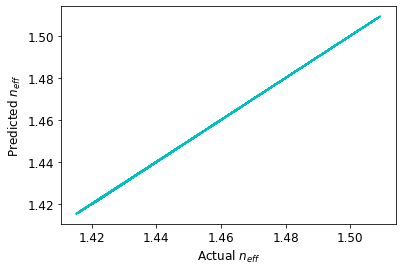

In [43]:
MSE = mean_squared_error(y_test_actual[:,1], pred[:,1])
R2 = r2_score(y_test_actual[:,1], pred[:,1])
print('RMSE=',np.sqrt(MSE),', R\u00b2= ', R2)
fig = plt.figure('tight layout')
plt.plot(y_test_actual[:,1],pred[:,1],'-.c')
plt.xlabel('Actual $n_{eff} $',fontsize= 12)
plt.ylabel('Predicted $n_{eff}$',fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#fig.savefig('Pred_vs_act_neff.jpg', dpi=600,bbox_inches='tight')
plt.show()



RMSE= 2.1883528528104183e-10 , R²=  0.9999425163349619


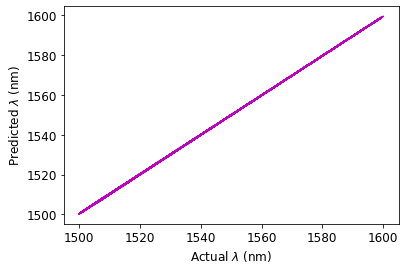

In [44]:
MSE = mean_squared_error(y_test_actual[:,0], pred[:,0])
R2 = r2_score(y_test_actual[:,0], pred[:,0])
print('RMSE=',np.sqrt(MSE),', R\u00b2= ', R2)
y_test_actual0 = y_test_actual[:,0]*10**9
pred0 = pred[:,0]*10**9
fig = plt.figure('tight layout')
plt.plot(y_test_actual0,pred0,'-.m')
plt.xlabel('Actual $\lambda$ (nm) ',fontsize= 12)
plt.ylabel('Predicted $\lambda$ (nm)',fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
fig.savefig('Pred_vs_act_lambda.jpg', dpi=600,bbox_inches='tight')
plt.show()


RMSE= 0.2133716864321428 , R²=  0.9960568003841614


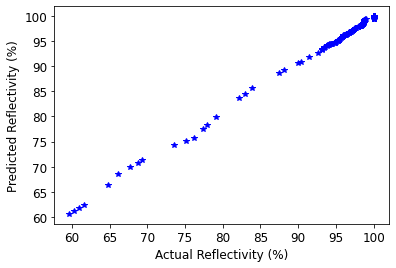

In [45]:
fig = plt.figure('tight layout')
MSE = mean_squared_error(y_test_actual[:,2], pred[:,2])
R2 = r2_score(y_test_actual[:,2], pred[:,2])
print('RMSE=',np.sqrt(MSE),', R\u00b2= ', R2)
plt.plot((y_test_actual[:,2]),pred[:,2],'*b')
plt.xlabel('Actual Reflectivity (%)',fontsize= 12)
plt.ylabel('Predicted Reflectivity (%)',fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#plt.xlim(94,100)
#plt.ylim(94,100)
#fig.savefig('Pred_vs_act_reflect.jpg', dpi=600,bbox_inches='tight')
plt.show()


RMSE= 0.000906815123516172 , R²=  0.9995435806220317


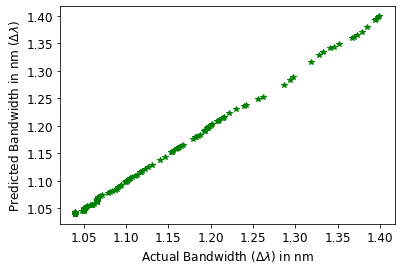

In [46]:

MSE = mean_squared_error(y_test_actual[:,3], pred[:,3])
R2 = r2_score(y_test_actual[:,3], pred[:,3])
print('RMSE=',np.sqrt(MSE),', R\u00b2= ', R2)

fig = plt.figure('tight layout')
plt.plot((y_test_actual[:,3]),pred[:,3],'*g')
plt.xlabel('Actual Bandwidth ($\Delta \lambda$) in nm',fontsize=12)
plt.ylabel('Predicted Bandwidth in nm ($\Delta \lambda$)',fontsize=12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#plt.xlim(94,100)
#plt.ylim(94,100)
fig.savefig('Pred_vs_act_bandwidth.jpg', dpi=600,bbox_inches='tight')
plt.show()


Below, we are plotting the graph between Bandwidth vs Grating Length as well as Reflectivity vs Grating length.

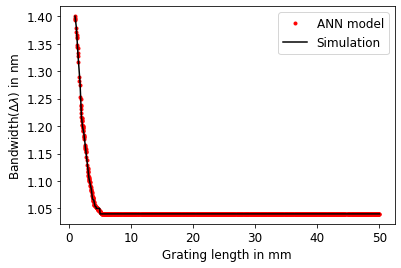

In [51]:

fig = plt.figure()
plt.plot((actual_test_data[:,3]),pred[:,3],'.r')
plt.plot((datafile_1[:,3]),datafile_1[:,7],'-k')

plt.xlabel('Grating length in mm',fontsize=12)
plt.ylabel('Bandwidth($\Delta \lambda$) in nm ',fontsize=12)
legend_properties = {'size':12}
plt.legend(['ANN model','Simulation'],prop=legend_properties)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#plt.xlim(94,100)
#plt.ylim(94,100)
fig.savefig('Band_vs_act_grat_len.jpg', dpi=600,bbox_inches='tight')
plt.show()



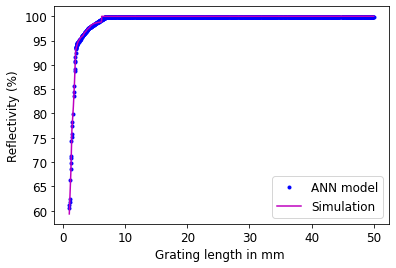

In [53]:
fig = plt.figure()
plt.plot((actual_test_data[:,3]),pred[:,2],'.b')
plt.plot((datafile_1[:,3]),datafile_1[:,6],'-m')
plt.xlabel('Grating length in mm ',fontsize=12)
plt.ylabel('Reflectivity (%)',fontsize=12)
#plt.xlim(2.5,10.0)
legend_properties = {'size':12}
plt.legend(['ANN model','Simulation'],prop=legend_properties)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#plt.ylim(90,110)
fig.savefig('Reflect_vs_act_grat_len.jpg', dpi=600,bbox_inches='tight')
plt.show()


Training Visualization of the model:-

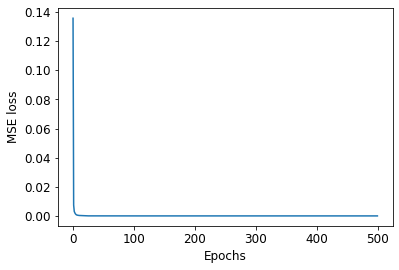

In [26]:
fig = plt.figure()
plt.plot(train_hist.history['mean_squared_error'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('MSE loss',fontsize=12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
#legend_properties = {'size':12}
#plt.legend(loc='upper right',prop=legend_properties)
plt.show()
fig.savefig('Training stage visualization.jpg', dpi=600,bbox_inches='tight')